# Day - 23 ___________#100DaysOfML

## EDA and Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/Arrithmia_cleanes.csv')


In [3]:
df.shape

(22634, 26)

In [4]:
df['type'].value_counts()

N       12043
VEB      7009
SVEB     2779
F         803
Name: type, dtype: int64

C:\Users\Sameer\AppData\Local\Temp\ipykernel_14036\881351215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

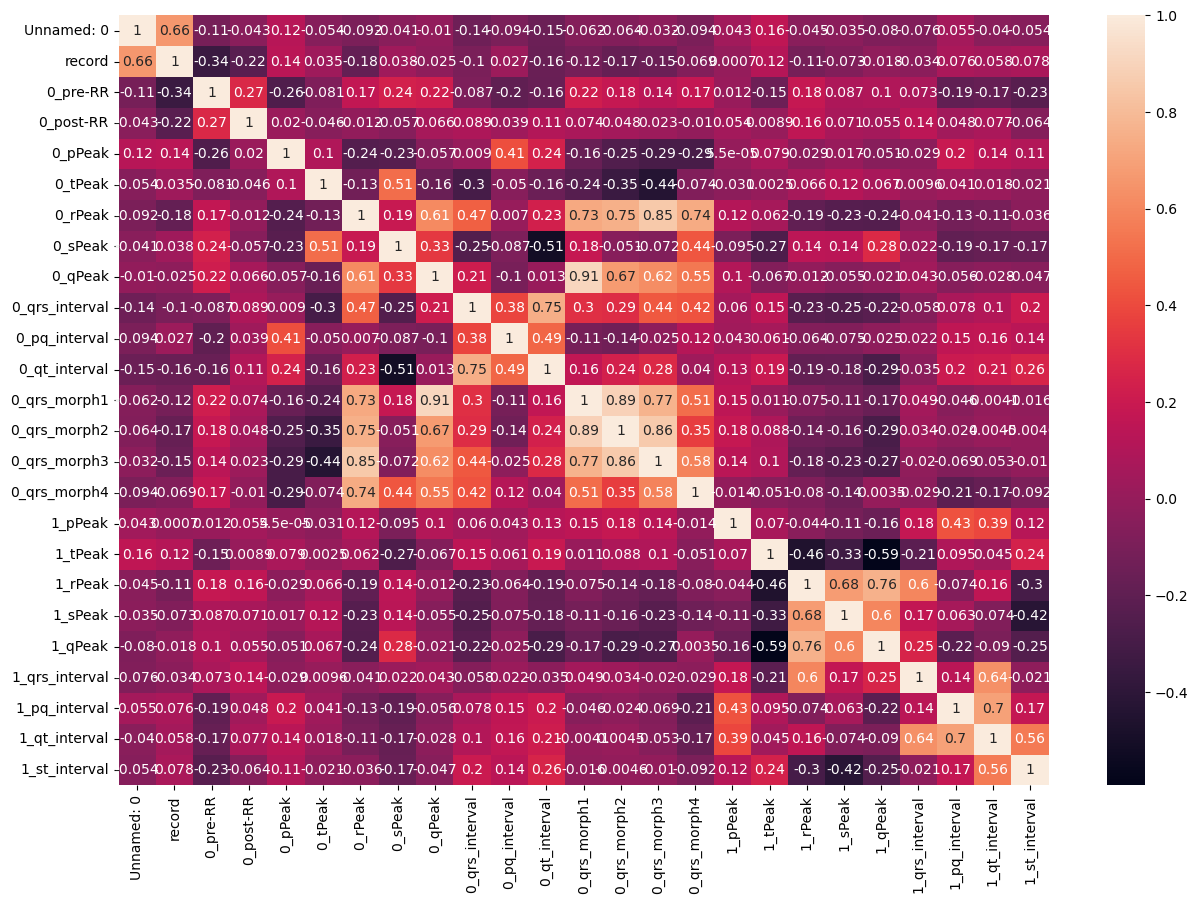

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [6]:
# 
def find_corr(dataset, threshold):
    cor_col = set()
    corr_matrix = df.corr(numeric_only = True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])) > threshold:
                colname = corr_matrix.columns[i]
                cor_col.add(colname)
    return cor_col

In [7]:
find_corr(df,0.78)

{'0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3'}

In [8]:
df.drop(columns = ['0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3'],inplace = True)

In [9]:
df.shape

(22634, 23)

C:\Users\Sameer\AppData\Local\Temp\ipykernel_14036\1897765154.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

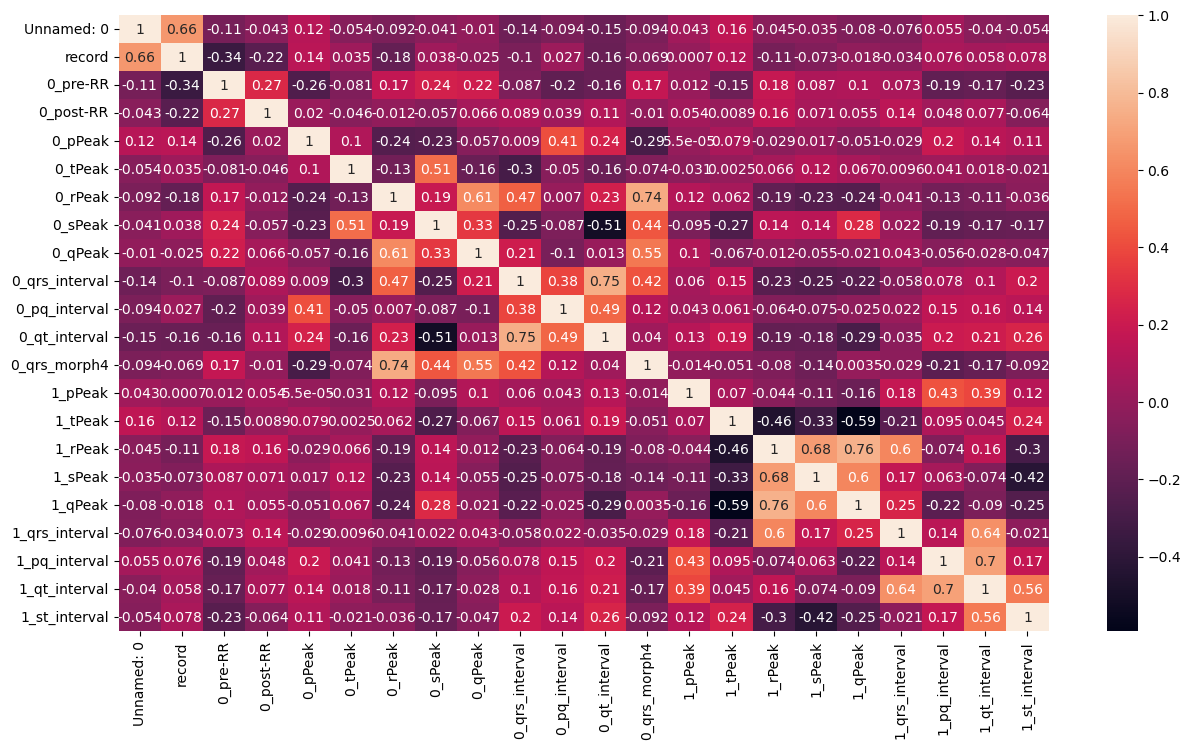

In [10]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),annot=True)

In [11]:
y = df['type']

In [12]:
df.shape

(22634, 23)

In [13]:
df.drop(columns = ['Unnamed: 0', 'record', 'type'],inplace  = True)

In [14]:
X = df.copy()

In [15]:
X

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval
0,330,329.0,-0.062253,-0.320439,1.046135,-0.444251,-0.073810,22,4,33,-0.041885,-0.006129,-0.014734,-0.015977,-0.015977,-0.024310,4,9,14,1
1,329,323.0,-0.074389,-0.302184,0.999053,-0.367677,-0.093196,22,11,39,0.119165,-0.018272,0.010559,0.028772,-0.080362,-0.031727,32,9,49,8
2,323,326.0,-0.064984,-0.290534,0.993015,-0.308465,-0.076629,23,5,31,-0.053601,-0.008597,0.055741,-0.017118,-0.077358,-0.020204,12,8,29,9
3,326,319.0,-0.072106,-0.315602,0.914281,-0.332271,-0.086239,22,5,32,-0.016841,-0.016812,0.014092,0.023347,-0.095587,-0.036039,33,10,52,9
4,313,328.0,-0.109740,-0.331818,0.963099,-0.377804,-0.137908,22,6,33,-0.026135,-0.014388,0.020378,0.026713,-0.086647,-0.038328,28,10,47,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22629,243,245.0,0.147228,-0.399865,1.379833,-0.746048,-0.138109,34,20,62,0.703466,-0.049193,0.308729,-0.024557,-0.024557,-0.075580,7,6,22,9
22630,243,243.0,-0.098084,-0.363152,1.326968,-0.700431,-0.107764,23,4,35,0.085047,-0.073822,0.385208,-0.045980,-0.045980,-0.075041,7,4,20,9
22631,243,247.0,-0.091347,-0.409054,1.404307,-0.733255,-0.102448,25,5,38,0.082942,-0.062491,0.380032,-0.022478,-0.022478,-0.087191,8,7,24,9
22632,241,251.0,-0.095250,-0.429370,1.399131,-0.686280,-0.095889,26,1,34,0.216953,-0.046497,0.445392,-0.047124,-0.047124,-0.073298,5,6,20,9


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_log_reg))

0.8018741633199464


In [20]:
X_train.columns

Index(['0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak',
       '0_qPeak', '0_qrs_interval', '0_pq_interval', '0_qt_interval',
       '0_qrs_morph4', '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak',
       '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval'],
      dtype='object')

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
print(accuracy_score(y_test,y_pred_clf))

0.9720214190093708


## Hyperparameter Tuning 

In [22]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [23]:
CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,refit=True,cv = 5,verbose=3)

<IPython.core.display.Javascript object>

In [ ]:
CV_rfc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.846 total time=   4.9s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.841 total time=   5.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.840 total time=   5.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.848 total time=   4.9s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.829 total time=   4.9s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.842 total time=  12.9s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.851 total time=  12.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.840 total time=  12.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.833 total time=  12.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.840 total time=  12.7s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.843 total time=   4.9s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.848 total time=   5.4s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.838 total time=   5.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.840 total time=   5.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.838 total time=   4.9s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.839 total time=  12.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.838 total time=  12.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.837 total time=  11.5s
[

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.874 total time=   4.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.876 total time=   4.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.869 total time=   4.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.875 total time=   3.9s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.877 total time=   4.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.876 total time=  10.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.875 total time=  10.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.874 total time=  10.1s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.873 total time=  10.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.879 total time=  10.2s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.876 total time=   4.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.875 total time=   4.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.875 total time=   4.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.876 total time=   3.9s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.879 total time=   4.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500;, score=0.877 total time=  10.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500;, score=0.876 total time=  10.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500;, score=0.871 total time=  10.3s
[

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.905 total time=   4.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.907 total time=   4.8s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.903 total time=   4.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.901 total time=   4.7s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.905 total time=   4.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.906 total time=  11.8s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.909 total time=  12.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.906 total time=  11.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.905 total time=  11.8s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500;, score=0.907 total time=  11.7s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200;, score=0.906 total time=   4.8s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200;, score=0.904 total time=   4.5s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200;, score=0.905 total time=   4.6s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200;, score=0.897 total time=   4.9s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200;, score=0.904 total time=   4.7s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500;, score=0.903 total time=  11.9s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500;, score=0.908 total time=  11.3s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500;, score=0.907 total time=  11.9s
[

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.924 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.925 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.921 total time=   5.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.921 total time=   5.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200;, score=0.922 total time=   5.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.924 total time=  13.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.923 total time=  13.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.923 total time=  13.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.921 total time=  13.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=500;, score=0.923 total time=  13.3s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.929 total time=   5.2s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.921 total time=   5.2s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.922 total time=   5.3s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.924 total time=   5.2s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200;, score=0.922 total time=   5.3s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500;, score=0.926 total time=  13.3s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500;, score=0.923 total time=  13.3s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500;, score=0.922 total time=  13.3s
[

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.942 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.935 total time=   5.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.931 total time=   5.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.938 total time=   5.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.937 total time=   5.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.940 total time=  13.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.938 total time=  13.2s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.931 total time=  18.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.937 total time=  15.0s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500;, score=0.937 total time=  13.2s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.939 total time=   5.2s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.937 total time=   5.2s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.933 total time=   5.2s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.936 total time=   5.2s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200;, score=0.938 total time=   5.2s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500;, score=0.941 total time=  13.2s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500;, score=0.937 total time=  13.1s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500;, score=0.932 total time=  13.0s
[

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.859 total time=   4.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.849 total time=   4.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.852 total time=   4.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.850 total time=   4.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200;, score=0.854 total time=   4.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.856 total time=  11.1s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.855 total time=  11.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.851 total time=  12.8s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.848 total time=  11.8s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=500;, score=0.855 total time=  11.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.848 total time=   4.4s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.854 total time=   4.4s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.849 total time=   4.4s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.848 total time=   4.4s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.855 total time=   4.4s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.851 total time=  11.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500;, score=0.854 total time=  11.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500;, score

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.885 total time=   5.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.884 total time=   5.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.877 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.879 total time=   5.3s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=200;, score=0.884 total time=   5.4s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.884 total time=  13.5s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.883 total time=  13.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.878 total time=  13.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.880 total time=  13.6s


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=500;, score=0.885 total time=  13.6s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.884 total time=   5.3s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.883 total time=   5.7s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.877 total time=   6.4s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.878 total time=   6.5s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.885 total time=   6.6s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500;, score=0.884 total time=  16.2s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500;, score=0.882 total time=  17.5s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500;, score

In [62]:
grid_pred = CV_rfc.predict(X_test_scaled)

In [63]:
print(accuracy_score(y_test,grid_pred))

0.9471218206157965


C:\Users\Sameer\AppData\Local\Temp\ipykernel_10232\1435159328.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scale')

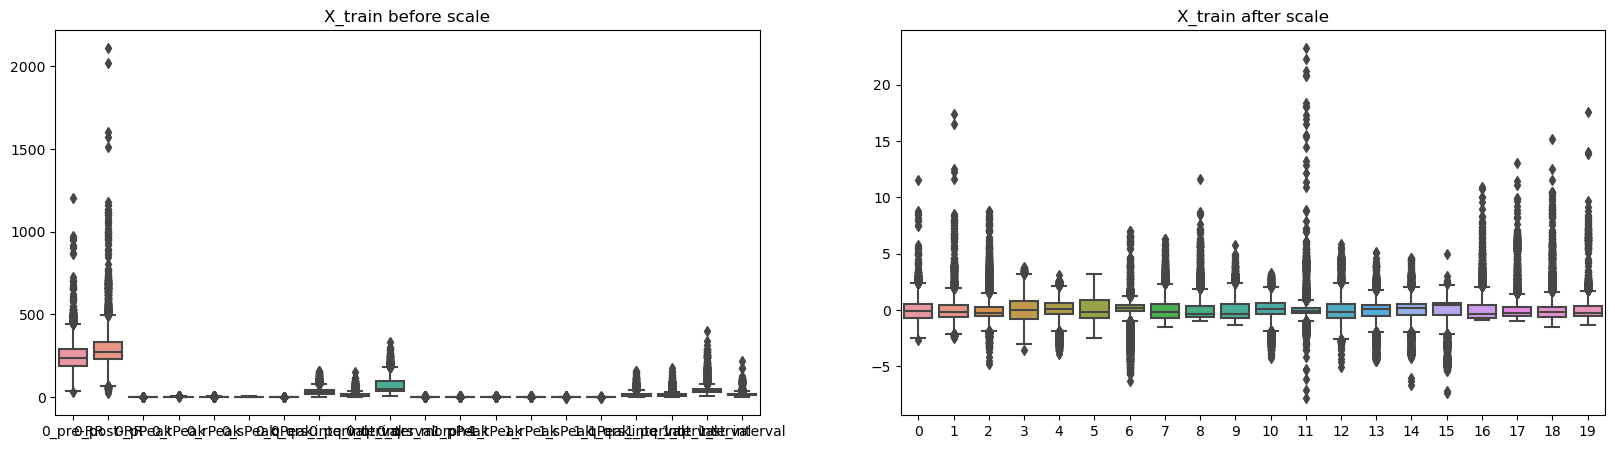

In [64]:
plt.subplots(figsize = (20,5))
plt.subplot(1,2,1)
# plt.ylim(0,100)

sns.boxplot(X_train)
plt.title("X_train before scale")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train after scale")

In [83]:
pickle.dump(clf,open('random_forest.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [66]:
pickle.dump(sc,open('scaler.pkl', 'wb'))

<IPython.core.display.Javascript object>

<Axes: xlabel='type', ylabel='count'>

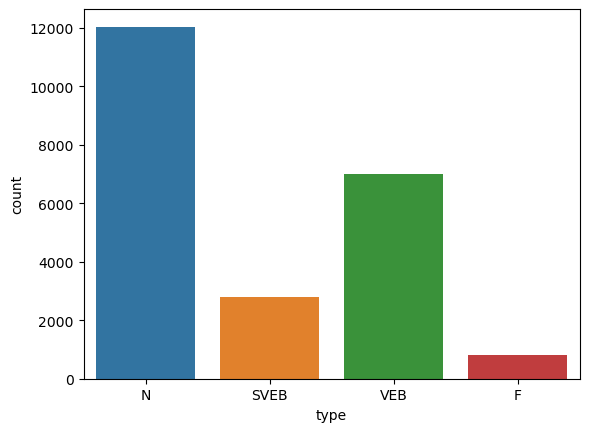

In [86]:
sns.countplot(data= df ,x = 'type')

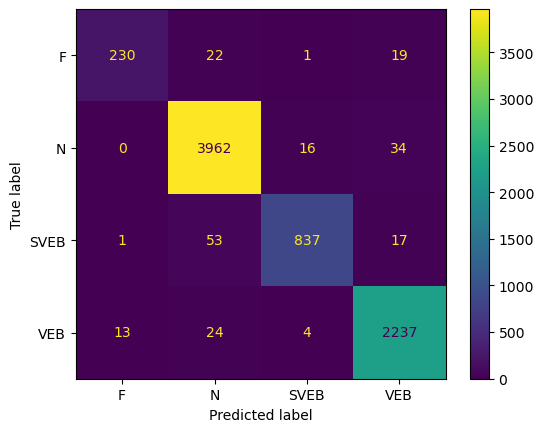

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_clf, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [1]:
from sklearn.metrics import classification_report
target = ['N', 'SVEB', 'VEB', 'F']
print(classification_report(y_test, y_pred_clf,target_names=target))

NameError: name 'y_test' is not defined